# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading dataset

In [3]:
d6 = pd.read_csv('bank_data.csv')
d6

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
d6.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Dropping features for max value above >1

In [5]:
d6 = d6.drop(columns = ['age','balance','duration','campaign','pdays','previous'])
d6.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day', 'month', 'poutcome', 'y'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and you want to check all columns
for column in d6.columns:
    if d6[column].dtype == object:  # if column data type is object
        print(column, 'is categorical')
    elif d6[column].nunique() < 3:  # if number of unique values is less than 10
        print(column, 'is categorical')
    else:
        print(column, 'is continuous')

job is categorical
marital is categorical
education is categorical
default is categorical
housing is categorical
loan is categorical
contact is categorical
day is continuous
month is categorical
poutcome is categorical
y is categorical


In [7]:
x = d6.drop(columns = ['y'])
y = d6['y']

# Split dataset into training set and test set

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=43)

# Implementing logistic regression

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [12]:
categorical_columns = x_train.select_dtypes(include=['object']).columns

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Pass through any non-categorical columns
)

In [14]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=600))
])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [16]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=600))])

# Implementing GridSearchCV for optimal parameters and accuracy score

In [18]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [19]:
categorical_columns = x_train.select_dtypes(include=['object']).columns

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Pass through any non-categorical columns
)

In [21]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [22]:
param_grid = {
    'classifier__C': [0.01, 0.09, 0.1],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': list(range(500, 600, 900)),
    'classifier__solver': ['saga', 'liblinear']
}

In [23]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [24]:
grid_search.fit(x_train, y_train)

# Print the optimal parameters and best score
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {}".format(grid_search.best_score_))

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anacond

Best Parameter: {'classifier__C': 0.09, 'classifier__max_iter': 500, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Score: 0.894616466019466


# Metrics scores

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Replace these placeholder values with your actual data
x_train = np.array([1, 2, 3, 4, 5])  # Your training features
y_train = np.array([2, 4, 5, 4, 5])  # Your training labels
x_test = np.array([6, 7, 8, 9, 10])   # Your test features
y_test = np.array([7, 8, 9, 10, 11])  # Your test labels

# Reshape the input data if needed
x_train = x_train.reshape(-1, 1)  # Assuming x_train is a single feature
x_test = x_test.reshape(-1, 1)    # Assuming x_test is a single feature

# Instantiate the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Use the model to predict the test set
y_pred = lr.predict(x_test)

In [9]:
# Use the model to predict the test set
y_pred = lr.predict(x_test)

# Print the predicted values
print(y_pred)

# Compute the accuracy of the actual model
act_accry = lr.score(x_train, y_train)

# Print the accuracy score
print(f'\nActual Accuracy: {act_accry*100}')


# Compute the accuracy of the model
accuracy = lr.score(x_test, y_test)

# Print the accuracy score
print(f'Prediction Accuracy: {accuracy*100}\n')

# Compute the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE score
print(f'Root Mean Squared Error: {rmse}\n')

r2 = r2_score(y_test, y_pred)
print(f'R-squared value is: {r2}')

[5.8 6.4 7.  7.6 8.2]

Actual Accuracy: 60.00000000000001
Prediction Accuracy: -115.99999999999979

Root Mean Squared Error: 2.0784609690826517

R-squared value is: -1.159999999999998


C:\Anaconda\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


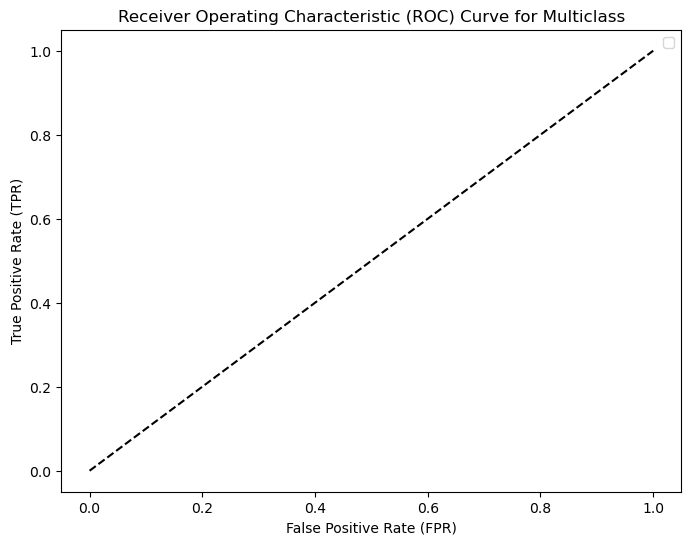

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming x_train, y_train, x_test, and y_test are your training and test data
# Instantiate the Logistic Regression model
logreg = LogisticRegression()

# Binarize the target variable for multiclass classification
unique_classes = np.unique(y_train)
y_train_bin = label_binarize(y_train, classes=unique_classes)
y_test_bin = label_binarize(y_test, classes=unique_classes)

# Create a One-vs-Rest (OvR) classifier
ovr_classifier = OneVsRestClassifier(logreg)

# Fit the OvR classifier to the training data
ovr_classifier.fit(x_train, y_train_bin)

# Predict probabilities for each class for the test data
probs = ovr_classifier.predict_proba(x_test)

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(unique_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
    
    # Check if there are positive samples in the test set for the current class
    if np.sum(y_test_bin[:, i]) > 0:
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], probs[:, i])
    else:
        roc_auc[i] = np.nan  # Set AUC to NaN if no positive samples

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(unique_classes)):
    # Skip plotting if AUC is NaN (no positive samples)
    if not np.isnan(roc_auc[i]):
        plt.plot(fpr[i], tpr[i], label=f'Class {unique_classes[i]} (AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend()
plt.show()